# **DESPESAS COM ELEIÇÕES vs. PARTIDOS ELEITOS**
## **Eleições Municipais para Prefeito e Vereadores do estado de São Paulo ano de 2020**

### 3º SEMESTRE ADS - TURMA A 2/2020 - ESTRUTURA DE DADOS

### **Professor:** 
### <a href="https://github.com/fmasanori" target="_blank">Fernando Masanori</a>

### **Alunos:** 
#### <a href="https://github.com/justhenrique" target="_blank">Washington Henrique Sousa</a>

#### <a href="https://github.com/LeonardoMessias98" target="_blank">Leonardo Messias</a>

### **Descrição:**
Este trabalho tem com objetivo apresentar uma análise de dados referente ao 'Despesas em Eleições vs. Canditados Eleitos no Estado de SP', no ano de 2020. Com duas fontes de dados: Despesas Contradas por Orgãos Partidários ('despesas_contratadas_orgaos_partidarios_2020_SP.csv') e Resultado das Votações municipais ('votacao_partido_munzona_2020_SP.csv') do Repositório de Dados Eleitorais oficial do Tribunal Superior Eleitoral (https://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1)

### **01. Importação de Bibliotecas e Dados**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import collections
from math import sqrt

In [7]:
dfDespesas = pd.read_csv("/home/henrique/Desktop/ep4/despesas_contratadas_orgaos_partidarios_2020_SP.csv", delimiter=';', encoding='Latin 1', usecols = ['NM_PARTIDO','SG_PARTIDO','NM_FORNECEDOR','DT_DESPESA','DS_DESPESA','VR_DESPESA_CONTRATADA'])
dfResultados = pd.read_csv("/home/henrique/Desktop/ep4/votacao_partido_munzona_2020_SP.csv", delimiter=';', encoding='Latin 1', usecols = ['ANO_ELEICAO','DS_ELEICAO','NM_MUNICIPIO','NM_PARTIDO','NM_COLIGACAO','QT_VOTOS_NOMINAIS'])

#### **01.1 Tabela Filtrada: Despesas Contradas**

In [8]:
dfDespesas.head()

,SG_PARTIDO,NM_PARTIDO,NM_FORNECEDOR,DT_DESPESA,DS_DESPESA,VR_DESPESA_CONTRATADA
0,PODE,Podemos,G DEBONI ADESIVOS,06/10/2020,ADESIVOS PARACHOQUE 30X7·5CM,"428,00"
1,PV,Partido Verde,Direção Estadual/Distrital,29/10/2020,#NULO#,"5500,00"
2,PODE,Podemos,#NULO#,05/10/2020,TARIFA BANCARIA,"21,00"
3,PODE,Podemos,ALPHACOR GRAFICA E EDITORA LTDA,02/10/2020,IMPRESSO ADESIVOS,"1400,00"
4,PODE,Podemos,#NULO#,19/10/2020,TARIFA BANCARIA,"5,20"


####  **01.2 Tabela Filtrada: Resultado das Votações municipais**

In [9]:
dfResultados.head()

,ANO_ELEICAO,DS_ELEICAO,NM_MUNICIPIO,NM_PARTIDO,NM_COLIGACAO,QT_VOTOS_NOMINAIS
0,2020,Eleições Municipais 2020,ASSIS,Partido Trabalhista Brasileiro,PARTIDO ISOLADO,3026
1,2020,Eleições Municipais 2020,MIRANTE DO PARANAPANEMA,Partido dos Trabalhadores,PARTIDO ISOLADO,191
2,2020,Eleições Municipais 2020,VARGEM,Partido Trabalhista Brasileiro,PARTIDO ISOLADO,361
3,2020,Eleições Municipais 2020,ITAÍ,Partido Trabalhista Brasileiro,PARTIDO ISOLADO,937
4,2020,Eleições Municipais 2020,GUAPIARA,Partido Trabalhista Brasileiro,PARTIDO ISOLADO,1563


### **02. Quantidade Total de Partidos** 

In [10]:
dfDespesas['NM_PARTIDO'].drop_duplicates().count()

32

### **03. Nome dos Partidos**

In [11]:
(dfDespesas['NM_PARTIDO']).drop_duplicates()

0                                               Podemos
1                                         Partido Verde
19                                            Cidadania
47                       Partido Trabalhista Brasileiro
57                           Partido Social Democrático
72              Partido da Social Democracia Brasileira
78                                        Solidariedade
112                     Partido Democrático Trabalhista
113                                        REPUBLICANOS
115                                          Democratas
120                                            Patriota
136                                     Partido Liberal
300                       Partido Socialista Brasileiro
366                         Partido Comunista do Brasil
407                      Partido Socialismo e Liberdade
458                           Partido dos Trabalhadores
814                    Movimento Democrático Brasileiro
853                                       PROGRE

#### **03.1 Sigla dos Partidos**

In [12]:
(dfDespesas['SG_PARTIDO']).drop_duplicates()

0                 PODE
1                   PV
19           CIDADANIA
47                 PTB
57                 PSD
72                PSDB
78       SOLIDARIEDADE
112                PDT
113       REPUBLICANOS
115                DEM
120           PATRIOTA
136                 PL
300                PSB
366            PC do B
407               PSOL
458                 PT
814                MDB
853                 PP
1217            AVANTE
1218               PSC
1407              PRTB
1515               PSL
1608               PTC
2369              REDE
3417              NOVO
3710               PMB
5992                DC
7270               PMN
8973              PROS
11836             PSTU
16268              PCB
24903               UP
Name: SG_PARTIDO, dtype: object

### **04. Quantidade Total de Despesas contratadas**

In [13]:
dfDespesas['DS_DESPESA'].count()

32280

### **05. Valor da soma TOTAL de Gastos (R$) em Despesas**

In [14]:
aux = 0
for x in (dfDespesas['VR_DESPESA_CONTRATADA']):
    aux += int(x.split(',')[0])


In [15]:
aux

146644303

### **06. Ranking: Partidos que mais Contrataram despesas**

#### **TOP 5**

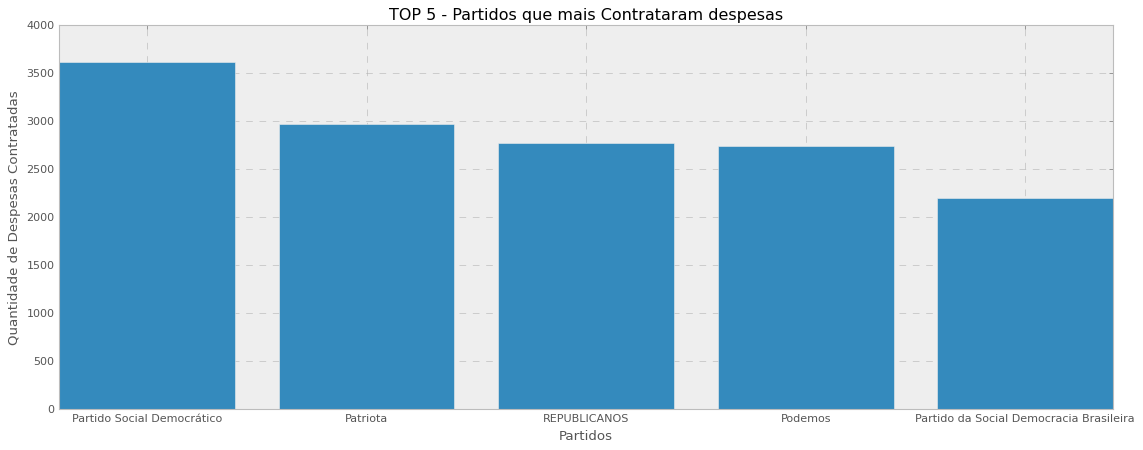

In [127]:
rank = dfDespesas['NM_PARTIDO'].value_counts()
top5 = dfDespesas['NM_PARTIDO'].value_counts()[0:5]

NM_P = ['Partido Social Democrático','Patriota','REPUBLICANOS','Podemos', 'Partido da Social Democracia Brasileira']
valores = top5

plt.figure(figsize = (17, 6))
plt.title('TOP 5 - Partidos que mais Contrataram despesas')
plt.bar(NM_P, valores)
plt.style.use("fast")
plt.xlabel("Partidos")
plt.ylabel("Quantidade de Despesas Contratadas")

plt.show()


#### **Ranking completo**

In [16]:
dfDespesas['NM_PARTIDO'].value_counts()

Partido Social Democrático                        3611
Patriota                                          2972
REPUBLICANOS                                      2769
Podemos                                           2739
Partido da Social Democracia Brasileira           2196
Democratas                                        1992
Partido dos Trabalhadores                         1939
Solidariedade                                     1592
Movimento Democrático Brasileiro                  1383
Partido Socialista Brasileiro                     1258
Cidadania                                         1184
Partido Social Liberal                            1168
Partido Liberal                                   1123
Partido Socialismo e Liberdade                     796
Partido Verde                                      771
Partido Trabalhista Brasileiro                     745
Partido Democrático Trabalhista                    684
Rede Sustentabilidade                              596
Partido So

### **07. Ranking: Despesas mais contradadas**

*Observação: A maior parte das despesas estavam sem descrição (#NULO#), não sendo possível em o que foi gasto o valor.*

#### **TOP 5**

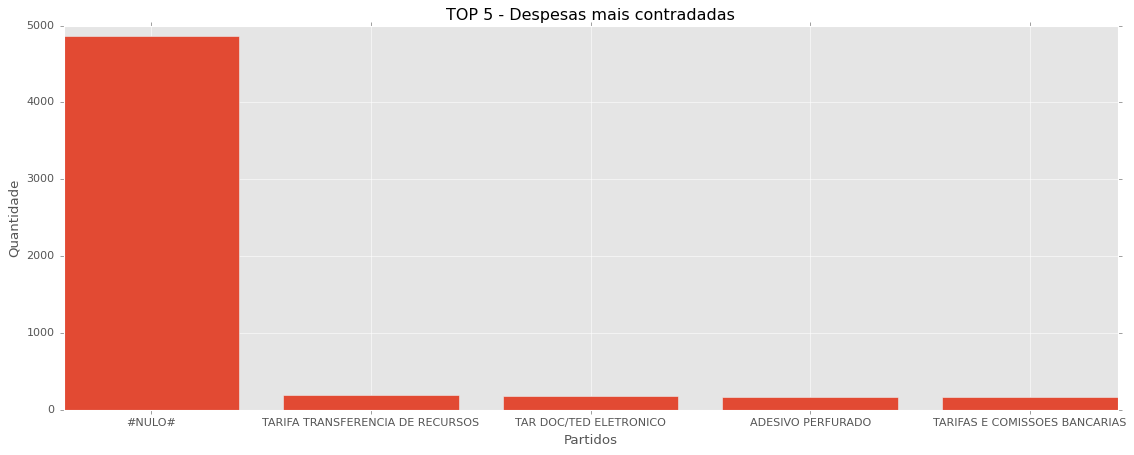

In [125]:
rank = dfDespesas['DS_DESPESA'].value_counts()
top5 = dfDespesas['DS_DESPESA'].value_counts()[0:5]

NM_P = ['#NULO#','TARIFA TRANSFERENCIA DE RECURSOS','TAR DOC/TED ELETRONICO','ADESIVO PERFURADO', 'TARIFAS E COMISSOES BANCARIAS']
valores = top5

plt.figure(figsize = (17, 6))
plt.title('TOP 5 - Despesas mais contradadas')
plt.bar(NM_P, valores)
plt.style.use("ggplot")
plt.xlabel("Partidos")
plt.ylabel("Quantidade")

plt.show()

#### **Ranking Completo**

In [17]:
dfDespesas['DS_DESPESA'].value_counts()

#NULO#                                            4870
TARIFA TRANSFERENCIA DE RECURSOS                   192
TAR DOC/TED ELETRONICO                             171
ADESIVO PERFURADO                                  165
TARIFAS E COMISSOES BANCARIAS                      164
                                                  ... 
ADESIVO PERFURADO 60X32 PREF + GILSINHO              1
TARIFA PROCESSAMENTO DE CHEQUES                      1
SALÃO COMERCIAL - LOCALIZADO EM JUNQUEIRÓPOLIS       1
ADESIVO REDONDO 30X30 PARA A CAND EDNA CABRERA       1
20-309-OFF SET 75 GR 10 X 15 CM FRENTE / VERSO       1
Name: DS_DESPESA, Length: 19824, dtype: int64

### **08. Ranking: Maiores Fornecedores**

*Observação: A maior quantidade de despesas não tinha o nome dos seus fornecedores*


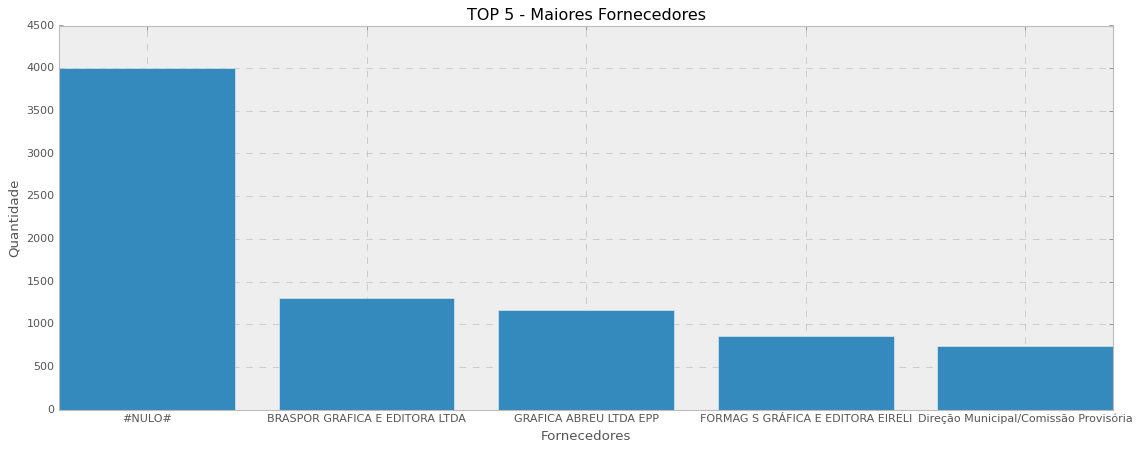

In [132]:
rank = dfDespesas['NM_FORNECEDOR'].value_counts()
top5 = dfDespesas['NM_FORNECEDOR'].value_counts()[0:5]

NM_P = ['#NULO#','BRASPOR GRAFICA E EDITORA LTDA','GRAFICA ABREU LTDA EPP','FORMAG S GRÁFICA E EDITORA EIRELI', 'Direção Municipal/Comissão Provisória']
valores = top5

plt.figure(figsize = (17, 6))
plt.title('TOP 5 - Maiores Fornecedores')
plt.bar(NM_P, valores)
plt.style.use("fast")
plt.xlabel("Fornecedores")
plt.ylabel("Quantidade")

plt.show()

In [18]:
dfDespesas['NM_FORNECEDOR'].value_counts()

#NULO#                                                4007
BRASPOR GRAFICA E EDITORA LTDA                        1309
GRAFICA ABREU LTDA EPP                                1168
FORMAG S GRÁFICA E EDITORA EIRELI                      861
Direção Municipal/Comissão Provisória                  739
                                                      ... 
ELEIÇÃO 2020 - VALERIA CRISTINA ROSSETO - VEREADOR       1
NICOLAS DE QUEIROZ RODRIGUES                             1
MERENCIANO OLIVEIRA SANTOS JUNIOR                        1
OMAR YAMYA CHAIN                                         1
JOANA SOLEIDE DIAS                                       1
Name: NM_FORNECEDOR, Length: 6785, dtype: int64

### **09. Ranking: Partidos com mais canditados eleitos**

*Observação: "Os eleitores devem votar em dois candidatos, um para prefeito e outro para vereador. Entretanto, diferentemente do cargo único do executivo, o legislativo possui mais vagas. Ou seja, mais de um vereador será eleito, variando de acordo com o número de habitantes do respectivo munícipio. A exemplo, uma cidade com até 15.000 habitantes pode eleger, no máximo, nove vereadores, sem restrição à reeleição." Fonte: <a href="https://www.dci.com.br/politica/eleicoes-2020/como-e-quantos-vereadores-serao-eleitos-por-municipio/38195/" target="_blank">JORNAL DCI</a>*

#### **TOP 5**

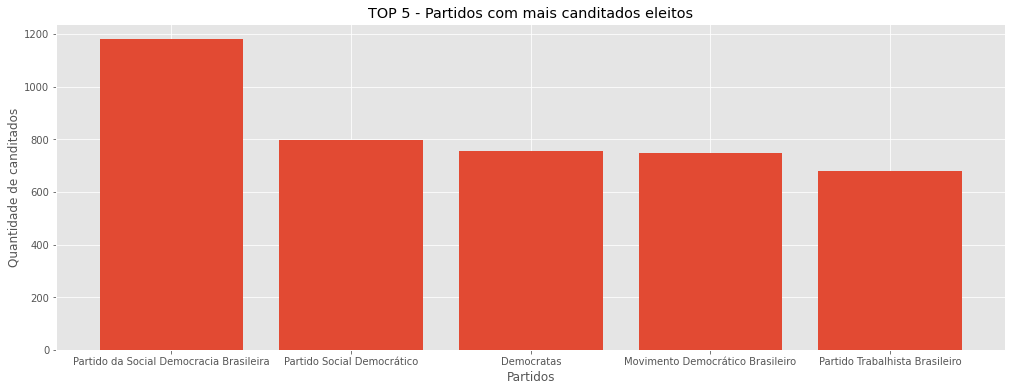

In [105]:
rank = dfResultados['NM_PARTIDO'].value_counts()
top5 = dfResultados['NM_PARTIDO'].value_counts()[0:5]

NM_P = ['Partido da Social Democracia Brasileira','Partido Social Democrático','Democratas','Movimento Democrático Brasileiro', 'Partido Trabalhista Brasileiro']
valores = top5

plt.figure(figsize = (17, 6))
plt.title('TOP 5 - Partidos com mais canditados eleitos')
plt.bar(NM_P, valores)
plt.style.use("ggplot")
plt.xlabel("Partidos")
plt.ylabel("Quantidade de canditados")

plt.show()


#### **Ranking Completo**

In [46]:
dfResultados['NM_PARTIDO'].value_counts().

Partido da Social Democracia Brasileira           1180
Partido Social Democrático                         797
Democratas                                         757
Movimento Democrático Brasileiro                   748
Partido Trabalhista Brasileiro                     681
REPUBLICANOS                                       680
Partido dos Trabalhadores                          634
Podemos                                            598
Partido Social Liberal                             596
Partido Liberal                                    585
Partido Socialista Brasileiro                      528
Patriota                                           471
PROGRESSISTAS                                      446
Partido Socialismo e Liberdade                     413
Partido Democrático Trabalhista                    410
Solidariedade                                      402
Partido Renovador Trabalhista Brasileiro           400
Cidadania                                          394
Partido Ve

### **10. Quantidade de Municipios no Estado de SP**

In [23]:
dfResultados['NM_MUNICIPIO'].drop_duplicates().count()

645